In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

from etna.datasets.tsdataset import TSDataset
from etna.transforms import LagTransform
from etna.transforms import LinearTrendTransform

In [3]:
df = pd.read_excel("Data/rebar12price.xls")
df.head()

,date,price
0,2018-01-01,36699.994012
1,2018-01-02,36699.994012
2,2018-01-03,36699.994012
3,2018-01-04,36699.994012
4,2018-01-05,36699.994012


In [4]:
df["timestamp"] = pd.to_datetime(df["date"])
df["target"] = df["price"]
df.drop(columns=["date", "price"], inplace=True)
df["segment"] = "segment_a"
df.head()

,timestamp,target,segment
0,2018-01-01,36699.994012,segment_a
1,2018-01-02,36699.994012,segment_a
2,2018-01-03,36699.994012,segment_a
3,2018-01-04,36699.994012,segment_a
4,2018-01-05,36699.994012,segment_a


In [5]:
df = TSDataset.to_dataset(df)
ts = TSDataset(df, freq="D")

In [6]:
ts.head(5)

segment,segment_a
feature,target
timestamp,
2018-01-01,36699.994012
2018-01-02,36699.994012
2018-01-03,36699.994012
2018-01-04,36699.994012
2018-01-05,36699.994012


In [7]:
from etna.analysis import acf_plot
from etna.analysis import cross_corr_plot
from etna.analysis import distribution_plot
from etna.analysis import plot_correlation_matrix

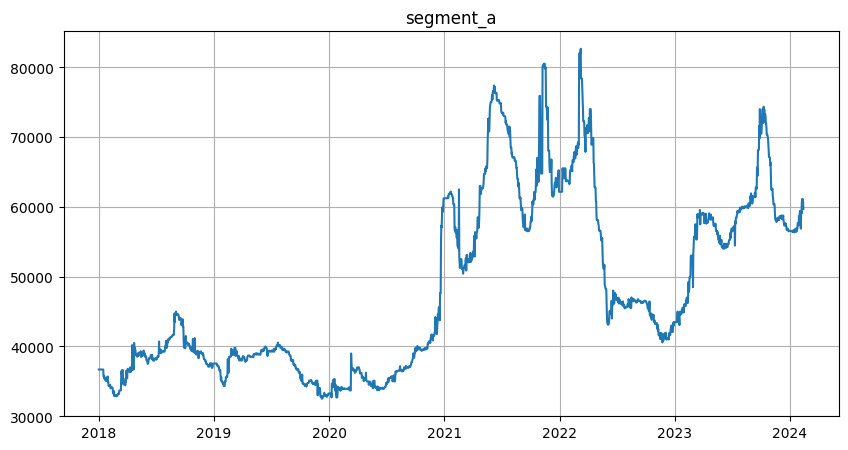

In [8]:
ts.plot()

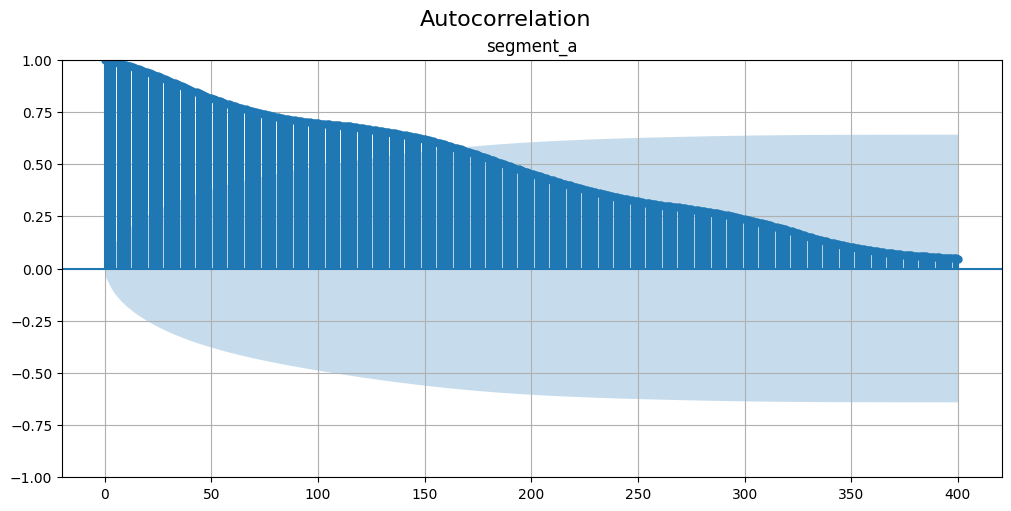

In [9]:
acf_plot(ts, lags=400)

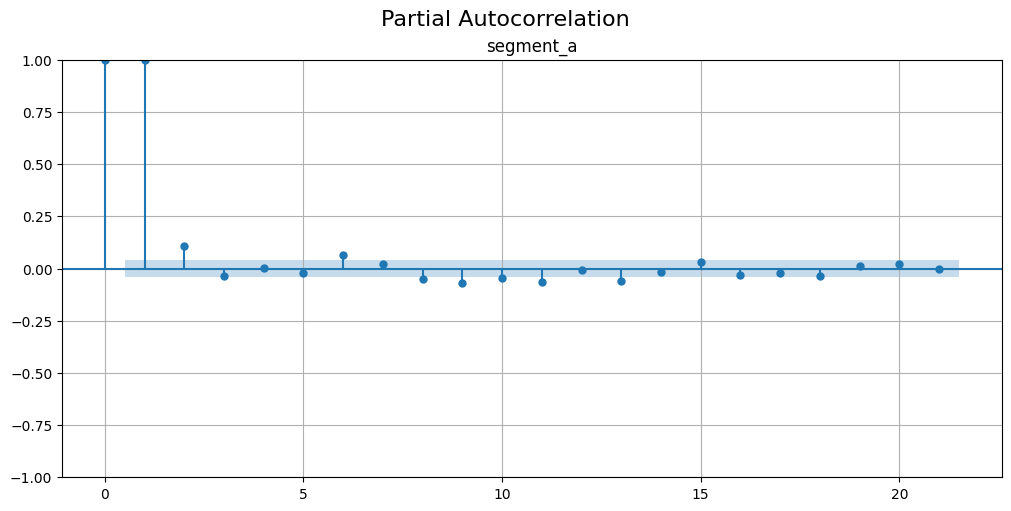

In [10]:
acf_plot(ts, lags=21, partial=True)

In [11]:
lags = LagTransform(in_column="target", lags=[100,300,400,500], out_column="lag")
ts.fit_transform([lags])


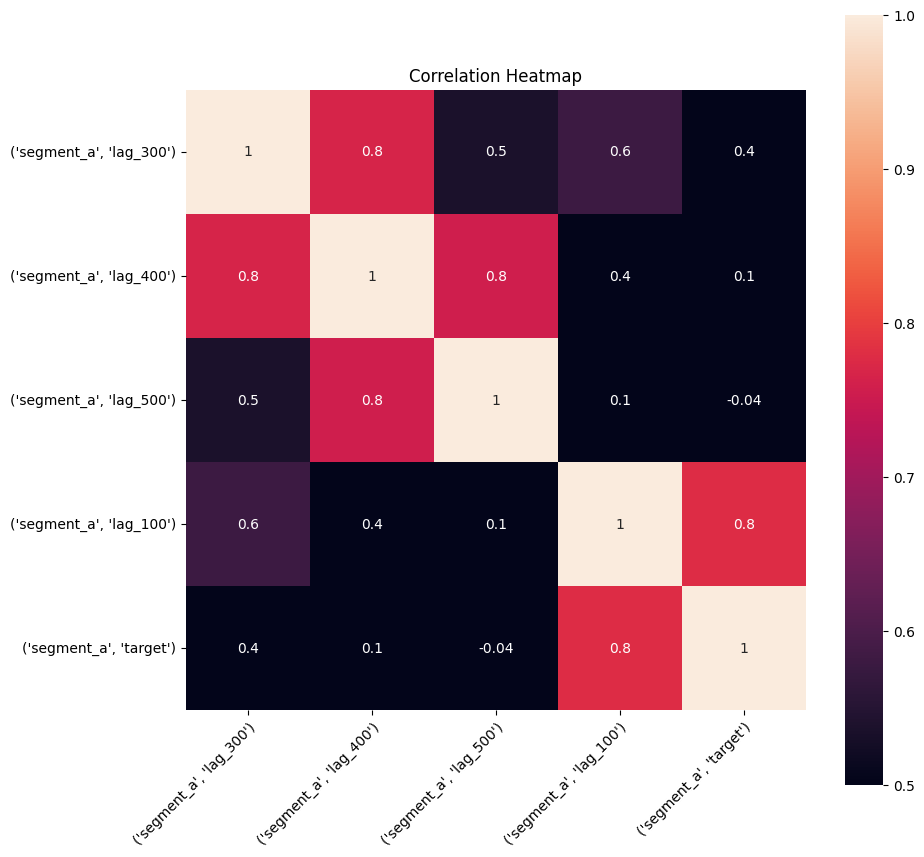

In [12]:
plot_correlation_matrix(ts, segments="segment_a", method="spearman", vmin=0.5, vmax=1)

In [13]:
from etna.analysis import plot_trend

In [14]:
trends = [
    LinearTrendTransform(in_column="target", poly_degree=1),
    LinearTrendTransform(in_column="target", poly_degree=2),
]

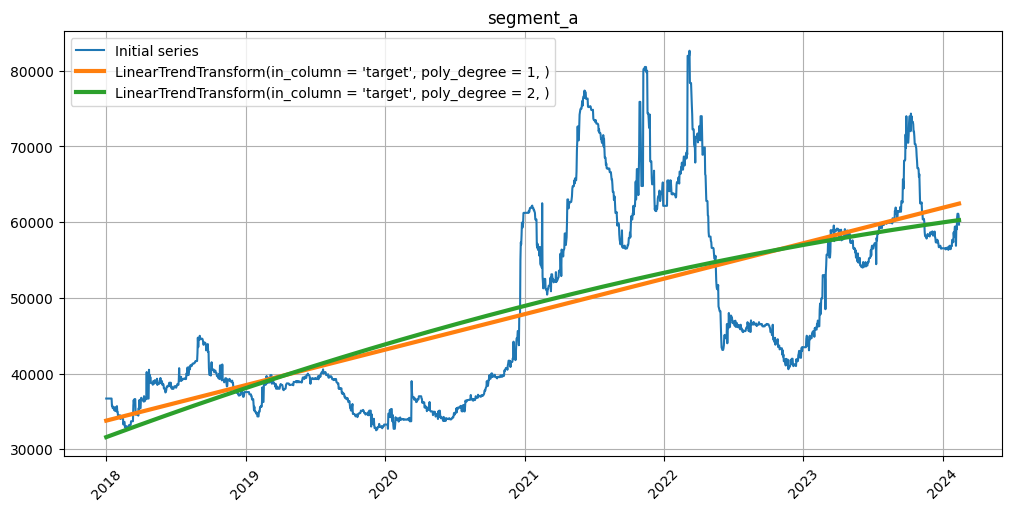

In [15]:
plot_trend(ts, trend_transform=trends)

In [16]:
from etna.analysis import plot_periodogram
from etna.analysis import seasonal_plot
from etna.analysis import stl_plot

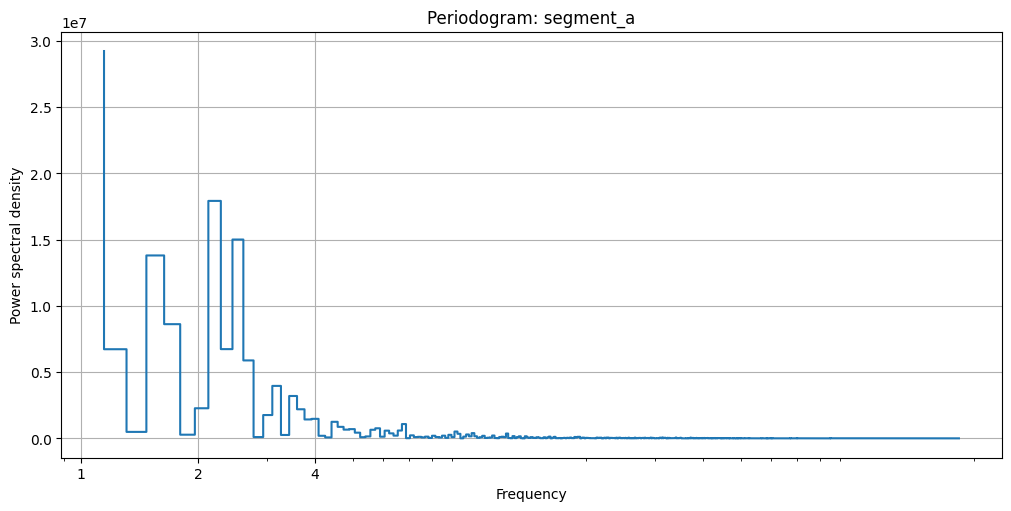

In [18]:
plot_periodogram(ts, period=365.2425, amplitude_aggregation_mode="per-segment", xticks=[1, 2, 4])

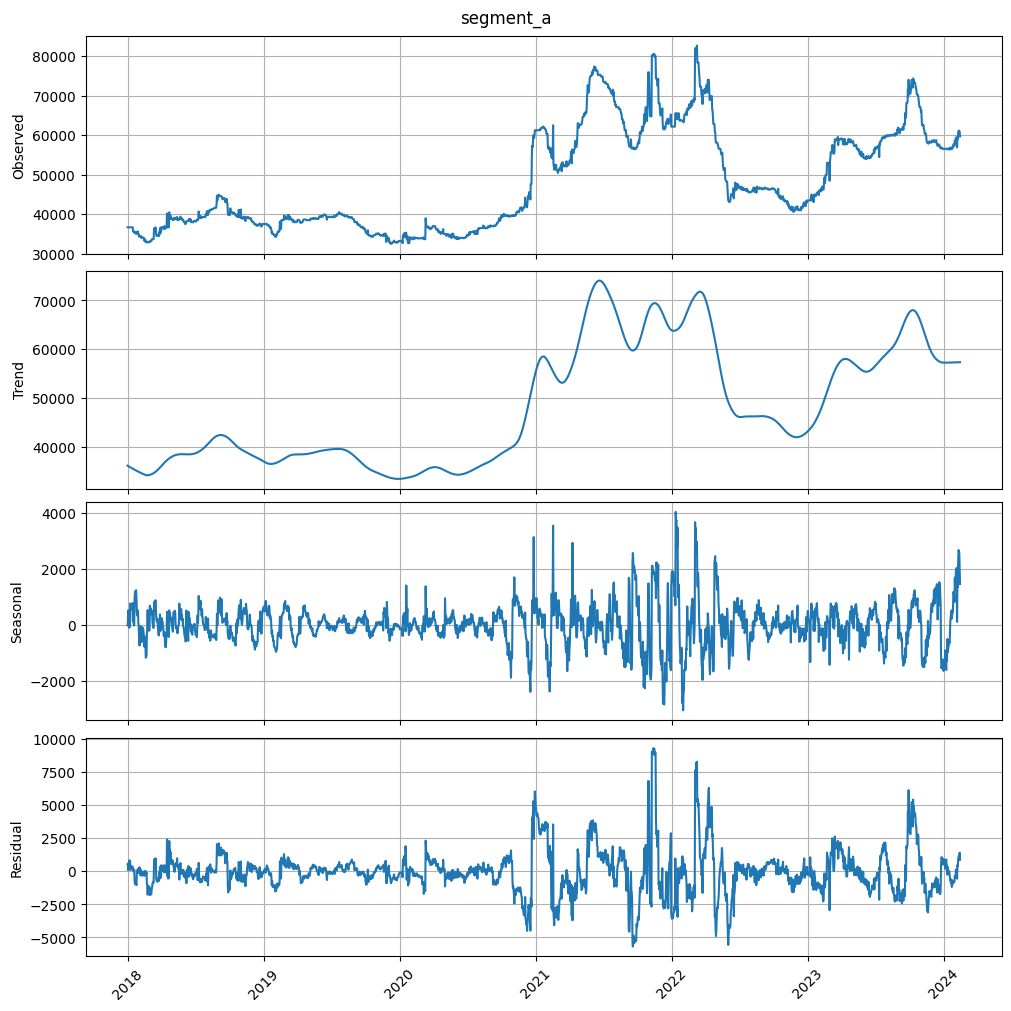

In [19]:
stl_plot(ts=ts, period=52)

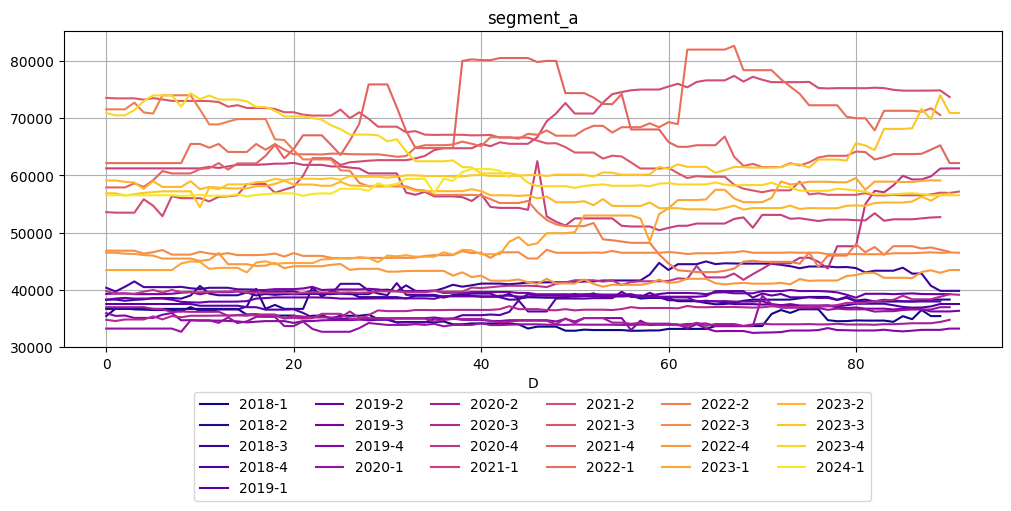

In [20]:
seasonal_plot(ts=ts, cycle="quarter")

In [21]:
from etna.analysis import get_anomalies_density
from etna.analysis import get_anomalies_median
from etna.analysis import plot_anomalies

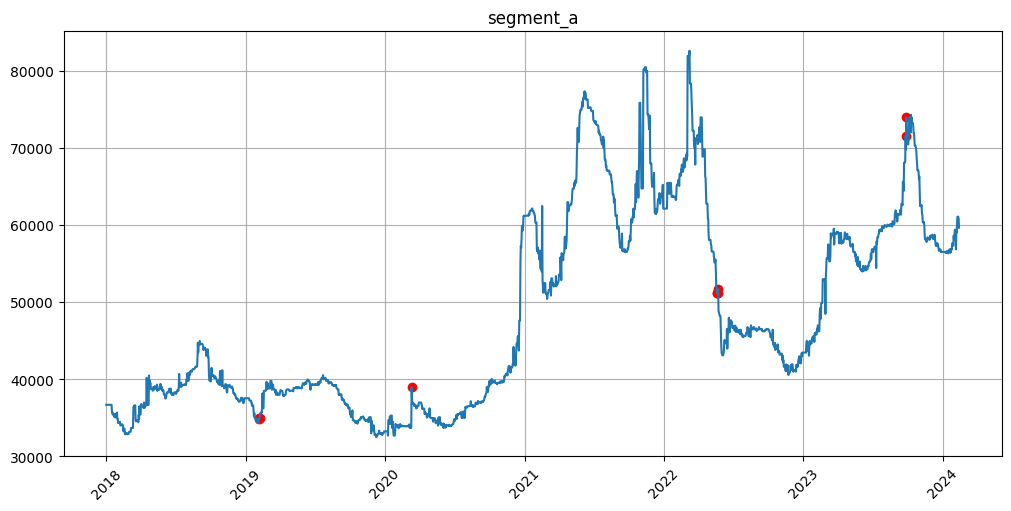

In [22]:
anomaly_dict = get_anomalies_median(ts, window_size=100)
plot_anomalies(ts, anomaly_dict)

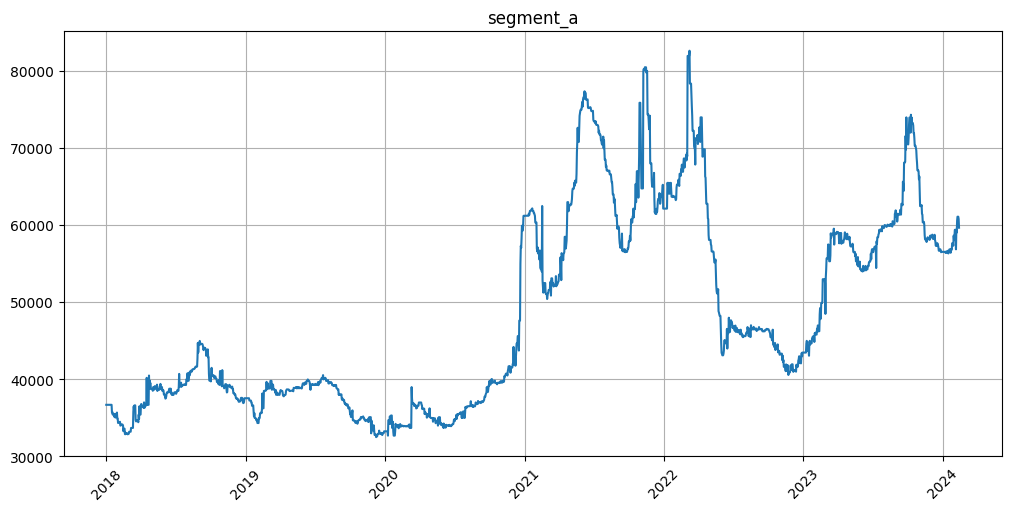

In [23]:
anomaly_dict = get_anomalies_density(ts)
plot_anomalies(ts, anomaly_dict)

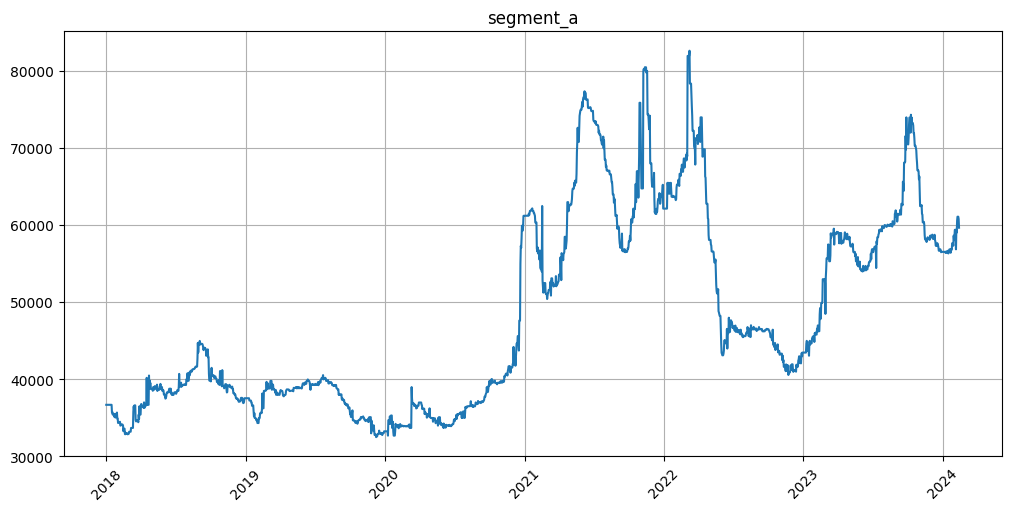

In [24]:
anomaly_dict = get_anomalies_density(ts)
plot_anomalies(ts, anomaly_dict)

In [25]:
from ruptures.detection import Binseg

from etna.analysis import find_change_points
from etna.analysis import plot_change_points_interactive
from etna.analysis import plot_time_series_with_change_points

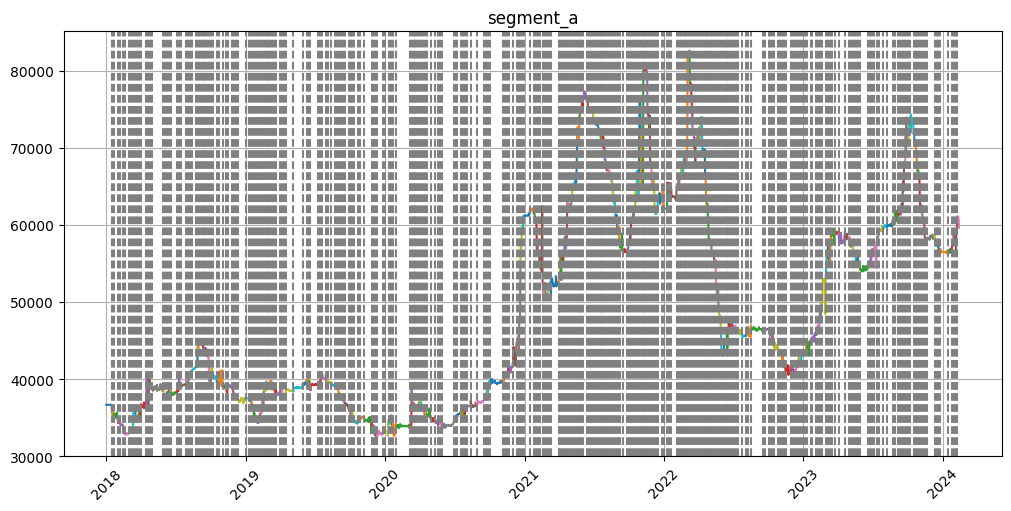

In [26]:
change_points = find_change_points(ts=ts, in_column="target", change_point_model=Binseg(), pen=1e5)
plot_time_series_with_change_points(ts=ts, change_points=change_points)